# Titatnic Survival Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [4]:
data.shape

(889, 12)

In [5]:
data.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
884     NaN
885     B42
886     NaN
887    C148
888     NaN
Name: Cabin, Length: 889, dtype: object

In [6]:
data.shape

(889, 11)

In [7]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Dropping Unimportant Columns

PassengerId doesn't provide any information about the survival.

Name and Ticket is no where related to Survival.

In [8]:
data.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


# Converting Object type Columns to Int

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["Sex"] = le.fit_transform(data["Sex"])
data["Embarked"] = le.fit_transform(data["Embarked"])

In [12]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# EDA

I feel to do it with whole new data

In [13]:
data_new=pd.read_csv('train.csv')

In [14]:
data_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Catplot

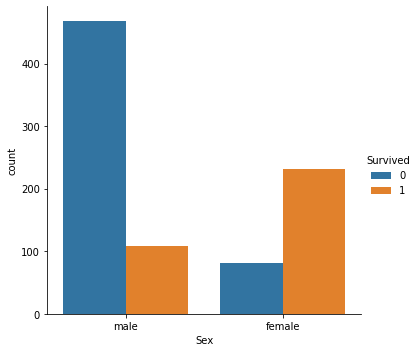

In [16]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = data_new)

# Inference

By seeing the graph assuming that survival rate of male is 30% and female is 70%.

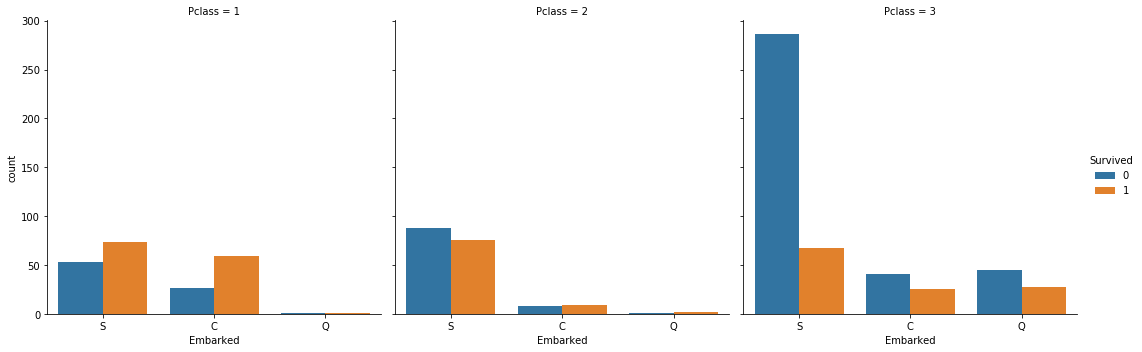

In [17]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data =data_new)

# Heatmap

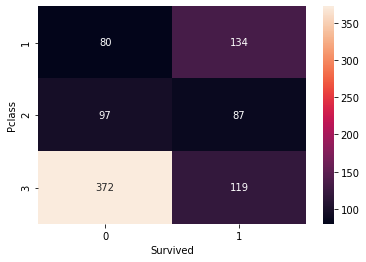

In [18]:
data_group = data_new.groupby(['Pclass', 'Survived']) 
S_pclass = data_group.size().unstack() 
sns.heatmap(S_pclass, annot = True, fmt ="d")

# Inference

By observing the heatmap we can assume that Class 1 passengers have more survival rate than Class 2 & 3.

In [19]:
y_log=data.iloc[:,:1]
y_log.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [20]:
x_log = data.drop(['Survived'], axis=1)
x_log.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


# Decision Tree

In [21]:
model = tree.DecisionTreeClassifier()
model.fit(x_log,y_log)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
model.score(x_log,y_log)

0.9797525309336333

# Random Forest

In [23]:
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [24]:
rf.fit(x_log,y_log)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
rf.oob_score_

0.8042744656917885

# Finding Important Columns for predicting Survived

In [26]:
a = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
for feature,imp in zip(a, rf.feature_importances_):
    print(feature,"\t\t :",imp);

Pclass 		 : 0.08548746796372993
Sex 		 : 0.26138062329225986
Age 		 : 0.25581310540126995
SibSp 		 : 0.05115345793754556
Parch 		 : 0.03937996603941885
Fare 		 : 0.27151386256743887
Embarked 		 : 0.03527151679833701


# Inference:

Pclass, Sex , Age,SibSp, Fare value is more than 0.05 so, they are the most important columns required.

In [27]:
imp_col = data[['Age', 'Sex', 'Fare','Pclass','SibSp']]
imp_col.head()

,Age,Sex,Fare,Pclass,SibSp
0,22.0,1,7.2500,3,1
1,38.0,0,71.2833,1,1
2,26.0,0,7.9250,3,0
3,35.0,0,53.1000,1,1
4,35.0,1,8.0500,3,0


In [28]:
model = tree.DecisionTreeClassifier(max_depth=12)
model.fit(imp_col,y_log)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Creating Tree

In [31]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [32]:
with open('dt2.dot','w') as f:
    f = tree.export_graphviz(model, feature_names=['Age', 'Sex', 'Fare','Pclass','SibSp'], out_file=f);

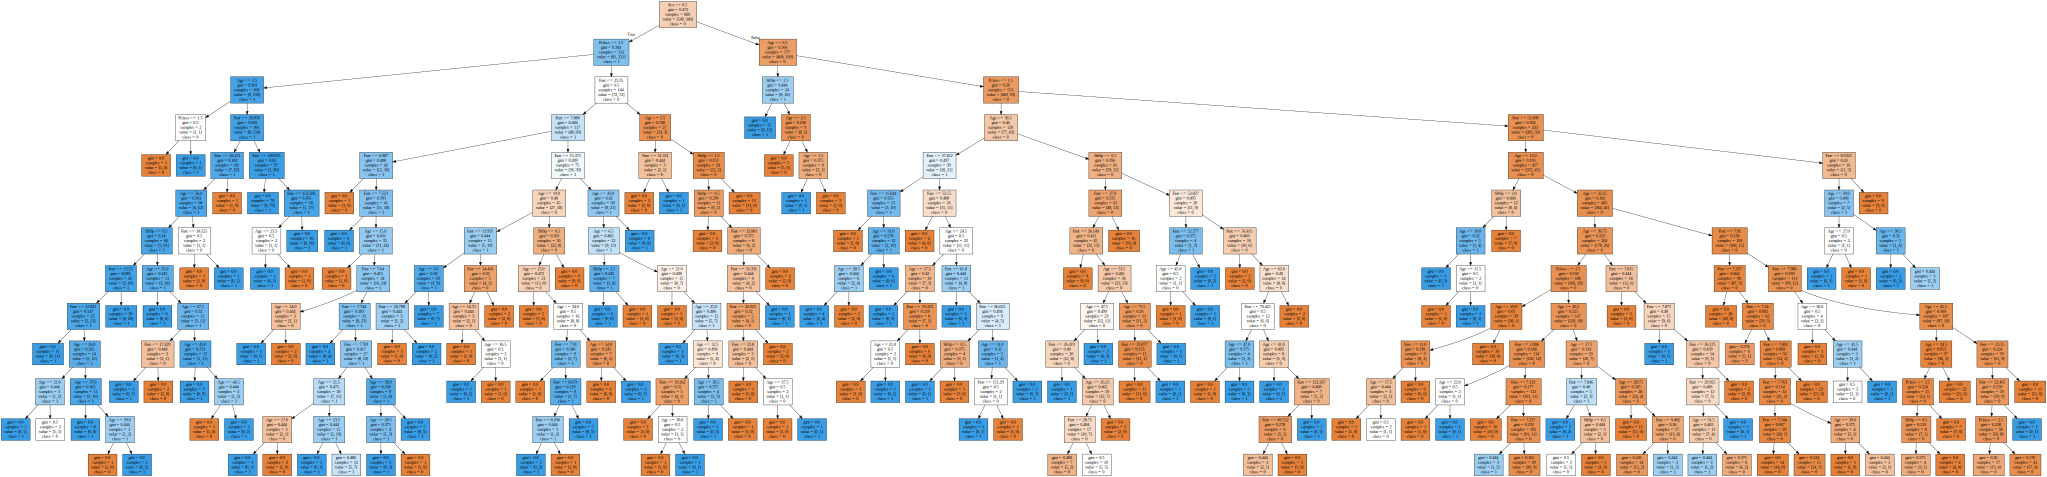

In [33]:
graph = Source(tree.export_graphviz(model, out_file=None, feature_names=['Age', 'Sex', 'Fare','Pclass','SibSp'],
                                    class_names=['0','1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

# Predicting Score

In [34]:
model.score(imp_col,y_log)

0.9482564679415073

# Fitting Random Forest

In [35]:
rf.fit(imp_col,y_log)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

# Accuracy Score

In [36]:
rf.oob_score_

0.8110236220472441

# Inference

Accuracy increased by a little by considering Important Columns rather than all columns.

# Testing the Model on Test Dataset

In [47]:
data_test = pd.read_csv('test.csv')
data_test_org = pd.read_csv('test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [38]:
data_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Dropping Unimportant Columns

In [39]:
data_test.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [40]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


# Converting Object type Columns to Int

In [41]:
data_test["Sex"] = le.fit_transform(data_test["Sex"])
data_test["Embarked"] = le.fit_transform(data_test["Embarked"])

In [42]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


# Prediction

In [43]:
pred = data_test[['Age', 'Sex', 'Fare','Pclass','SibSp']]
pred.head()

,Age,Sex,Fare,Pclass,SibSp
0,34.5,1,7.8292,3,0
1,47.0,0,7.0000,3,1
2,62.0,1,9.6875,2,0
3,27.0,1,8.6625,3,0
4,22.0,0,12.2875,3,1


In [45]:
y_pred = model.predict(pred)
print(y_pred)

[0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 0 0 0]


# Storing into Result

In [49]:
result = pd.DataFrame({'PassengerId': data_test_org['PassengerId'], 'Survived': y_pred })
print(result)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         0
..           ...       ...
412         1305         0
413         1306         1
414         1307         0
415         1308         0
416         1309         0

[417 rows x 2 columns]
